In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

### Exempel 3.5

Vi genererar $500$ slumpmässiga utfall $(x_2,x_3)$ från den betingade fördelningen $[X_2,X_3]^T | X_1 = 0.5$ där

$$
\begin{split}
            X_1 &= N_1,\\
            X_2 &= 3X_1 + N_2,\\
            X_3 &= 2X_1 + N_2.
\end{split}
$$

och $N_1,N_2,N_3$ är oberoende och $\textrm{n}(0,1)$-fördelade.
Vi använder Box-Mueller metoden från föreläsning 1:

In [2]:
# Box-Mueller metoden
def Box_Mueller(n):
    u1 = stats.uniform.rvs(size = n)
    u2 = stats.uniform.rvs(size = n)
    x_samps = np.array([(-2*np.log(u1[i]))**(1/2)*np.cos(2*np.pi*u2[i]) for i in range(n)])
    return x_samps

In [4]:
def sampler_betingat(n):
    n2 = Box_Mueller(n)
    n3 = Box_Mueller(n)
    joint_samps = [[3*(0.5) + n2[i], 2*(0.5) + n3[i]] for i in range(n)]
    return np.array(joint_samps)

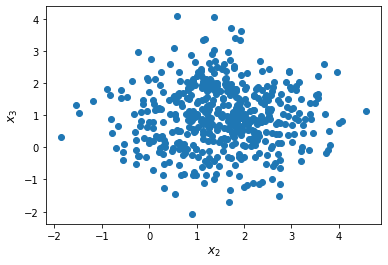

In [11]:
betingat_samps = sampler_betingat(500)

plt.scatter(betingat_samps[:,0], betingat_samps[:,1])
plt.xlabel('$x_2$', fontsize=12)
plt.ylabel('$x_3$', fontsize=12)

# plt.savefig("betingat_samps.pdf", bbox_inches='tight')
plt.show()

Vi ser ingen korrelation, vilket är rimligt eftersom $X_2$ och $X_3$ är oberoende givet $X_1 = 0.5$.

Nu genererar vi $500$ slumpmässiga utfall från marginalfördelningen $[X_2,X_3]^T$.

In [12]:
def sampler_marginal(n):
    n1 = Box_Mueller(n)
    n2 = Box_Mueller(n)
    n3 = Box_Mueller(n)
    
    x1 = n1
    joint_samps = [[3*x1[i] + n2[i], 2*x1[i] + n3[i]] for i in range(n)]
    return np.array(joint_samps)

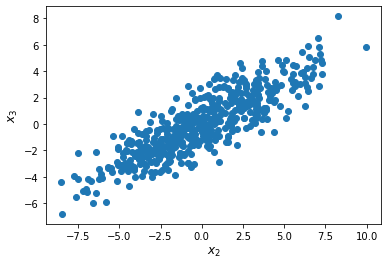

In [13]:
marg_samps = sampler_marginal(500)

plt.scatter(marg_samps[:,0], marg_samps[:,1])
plt.xlabel('$x_2$', fontsize=12)
plt.ylabel('$x_3$', fontsize=12)

# plt.savefig("marginal_samps.pdf", bbox_inches='tight')
plt.show()

Nu ser vi korrelation mellan $X_2$ och $X_3$, vilket är rimligt eftersom $X_2$ och $X_3$ är kopplade mellan var och en resultat $x_1$ genererade från $X_1$; det vill säga att $X_2$ och $X_3$ är inte oberoende.